In [1]:
from fmm import FMMDistance
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tqdm.notebook import tqdm
import sys
np.set_printoptions(threshold=sys.maxsize, linewidth=200, formatter={'float': lambda y: "{:.0f}".format(y)})

In [2]:
# We are going to use a one-source FMM
grid_size = 100
initial_conditions = [(50,50), (51,51), (50, 51), (51,50)]
# initial_conditions = [(int(.25*grid_size), int(.5*grid_size)), (int(.75*grid_size), int(.5*grid_size))]

fmm = FMMDistance(initial_conditions, grid_size)
max_iteration, distance_mat = fmm.calculate_distance()

Calculating Distance: 9998it [00:16, 593.11it/s]
Calculations finished with 9998 iterations.


In [3]:
print(len(distance_mat), distance_mat[0].shape)

9998 (100, 100)


In [4]:
def gaussian_height(sigma, x, mu=0):
    first = 1.0/(np.sqrt(2 * np.pi * sigma**2))
    second_pow_top = -1.0 * (x-mu)**2
    second_pow_bot = 2.0 * sigma ** 2
    second = np.exp(second_pow_top / second_pow_bot)
    return first * second

print(gaussian_height(sigma=1, x=1))

0.24197072451914337


In [5]:
n = len(distance_mat)-1
res_mat = []
# for layer in range(0, len(distance_mat), 4):
for layer in range(0, 800, 2):
    curr = distance_mat[layer].copy()
    curr[curr > 1e9] = -1
    sigma = np.amax(curr)

    temp = np.empty(shape=curr.shape)

    for i in range(curr.shape[0]):
        for j in range(curr.shape[1]):
            if curr[i,j] != -1:
                temp[i, j] = gaussian_height(sigma=sigma*1.2, x=curr[i,j]*2)
            else:
                temp[i, j] = gaussian_height(sigma=sigma*1.2, x=distance_mat[n][i,j]*2)
    
#     if layer % 10 == 0:
#         print(temp)

    res_mat.append(temp*1000-5)

<Figure size 640x480 with 0 Axes>

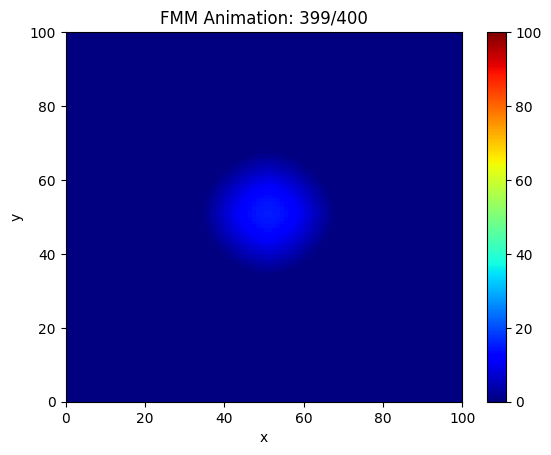

Done


In [6]:
max_iter = len(res_mat)

for i in range(len(res_mat)):
    res_mat[i][res_mat[i] > 1e9] = 0

def create_anim(source_type):
    plt.clf()
    fig, ax = plt.subplots(facecolor='white')

    cax = ax.pcolormesh(res_mat[0], cmap=plt.cm.jet, vmin=0, vmax=100)
    fig.colorbar(cax)

    def animate(i):
        ax.set_title(f"FMM Animation: {i}/{max_iter}")
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        cax.set_array(res_mat[i].flatten())

    anim = animation.FuncAnimation(fig, animate, repeat_delay=2000, interval=1, frames=range(int(max_iter)))
    anim.save(f'{source_type}_source_fmm.gif')
    plt.show()

    print("Done")

create_anim("figures/one_temp_7")